In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from pprint import pprint
from util import xgb_helper

# Load data

In [14]:
f = open('data/LC_model_input.pckl', 'rb')
data = pickle.load(f)
f.close()

xtrain = data['xtrain']
ytrain = data['ytrain']
xtest = data['xtest']
ytest = data['ytest']
xeval = data['xeval']
yeval = data['yeval']
features = data['features']

# Load the trained model in step 3

In [15]:
model = xgb_helper.XGBModel()
model.load_model()

In [16]:
res = model.eval_detail(xeval, yeval, features)

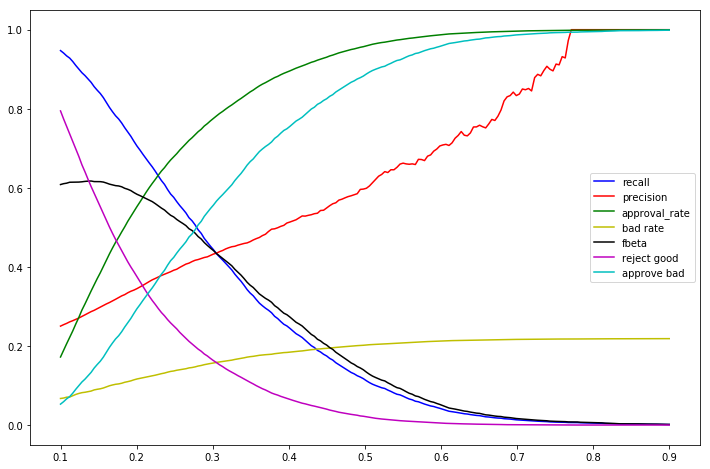

In [17]:
plt.figure(figsize=(12, 8))
model.report(res)

# Check the bad probability distribution

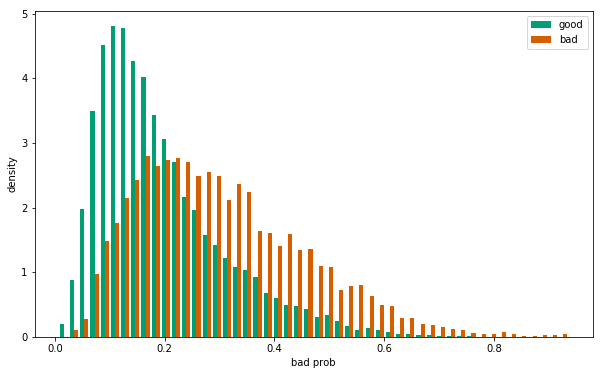

In [18]:
plt.figure(figsize=(10, 6))
model.eval_hist(xeval, yeval, features)

In [19]:
# We also select cutoff = 0.12 and see the performance

[[ 6115 14162]
 [  511  5166]]


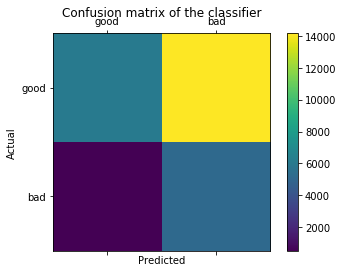

In [20]:
res = model.eval_cutoff(xeval, yeval, features, 0.12, is_plot=True)

In [21]:
pprint(res)

{'approval_rate': 0.2552978346339206,
 'approve_bad': 0.09001233045622688,
 'auc': 0.7251860221053783,
 'bad_rate': 0.07712043466797704,
 'cutoff': 0.12,
 'f_beta': 0.6144733085926348,
 'ks': 0.3391098982804904,
 'map': 0.4333856761140358,
 'mat': array([[ 6115, 14162],
       [  511,  5166]], dtype=int64),
 'precision': 0.26728062913907286,
 'recall': 0.9099876695437731,
 'reject_good': 0.6984267889727277}


In [22]:
# res using 1pct data
# {'approval_rate': 0.7369029275929752,
#  'approve_bad': 0.035211267605633804,
#  'auc': 0.9911424910409201,
#  'bad_rate': 0.010454783124915308,
#  'cutoff': 0.12,
#  'f_beta': 0.9272419627749576,
#  'ks': 0.9056240797844265,
#  'map': 0.974009886355589,
#  'mat': array([[1893,  135],
#        [  20,  548]], dtype=int64),
#  'precision': 0.8023426061493412,
#  'recall': 0.9647887323943662,
#  'reject_good': 0.06656804733727811}


In [23]:
# res using 10pct data
# {'approval_rate': 0.7615396470689846,
#  'approve_bad': 0.011097410604192354,
#  'auc': 0.9983773877472539,
#  'bad_rate': 0.003187452573682232,
#  'cutoff': 0.12,
#  'f_beta': 0.9713811122261828,
#  'ks': 0.9650181693080516,
#  'map': 0.9957543077056852,
#  'mat': array([[19702,   575],
#        [   63,  5614]], dtype=int64),
#  'precision': 0.9070932299240588,
#  'recall': 0.9889025893958077,
#  'reject_good': 0.028357252058983085}

In [24]:
# res using 100pct data
# {'approval_rate': 0.7923410336171257,
#  'approve_bad': 0.004729663428515356,
#  'auc': 0.9995544143083134,
#  'bad_rate': 0.0012006835432573208,
#  'cutoff': 0.12,
#  'f_beta': 0.9888661401969387,
#  'ks': 0.9872577583657481,
#  'map': 0.9989198551925129,
#  'mat': array([[200478,   1891],
#        [   241,  50714]], dtype=int64),
#  'precision': 0.9640528466875772,
#  'recall': 0.9952703365714847,
#  'reject_good': 0.009344316570225678}